In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#from IPython.display import display

# Building on Physics Past
## Lecture 18

To get nice-looking $\LaTeX$ formatted output run:

In [4]:
sp.init_printing()

And for interactive use, it is helpful to load all of the components:

In [2]:
from sympy import *

## Differential Equations


SymPy is capable of solving (some) Ordinary Differential. To solve
differential equations, use `dsolve`. 

For example, the Bernouilli DE is

$$x \frac{d}{dx} y(x) + y(x) - y(x)^2=0$$

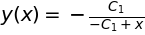

In [5]:
y = Function('y')
x = Symbol('x')
dsolve( x*y(x).diff(x) + y(x) - y(x)**2, y(x))

Sometimes, you can help SymPy along by giving it a `hint`

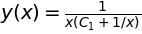

In [6]:
dsolve( x*y(x).diff(x) + y(x) - y(x)**2, y(x), hint='Bernoulli')

Or, for a differential equation like

$$ \frac{dy}{dx} = 2 y$$

In [9]:
dsolve( y(x).diff(x) - 2*y(x), y(x))

In [10]:
dsolve( y(x).diff(x) - 2*y(x), y(x), hint='1st_power_series')

Or, consider this second-order harmonic oscillator:

$$ \frac{d^2}{dx^2} y(x) + y(x) = 0$$

with $y(0) = 2$ and $y'(0) = 1$

In [13]:
dsolve(y(x).diff(x,x) + y(x), y(x) )

The solution has two undetermined coefficients, $C_1$ and $C_2$. We can calculate those as well if we supply appropriate boundary and/or initial conditions. 

As of right now, SymPy only supports initial conditions in the special case of solving for power series solutions of ODEs.  Until that code is developed, do to this automatically, we can still solve for the coefficients ourselves:

In [14]:
soln = _.rhs   # _ means the last thing calculated, we just want the right hand side

ics = [ soln.subs(x, 0) - 2,
        soln.diff(x).subs(x,0) - 1]
ics

In [15]:
coeffs = solve(ics)
coeffs

So, we can substitute this back into our solution

In [16]:
soln = soln.subs(coeffs)
soln

And finally plot it

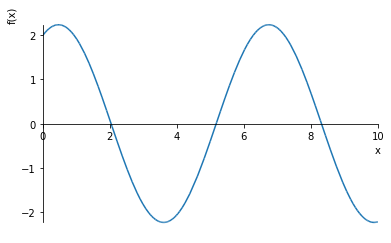

In [17]:
plot(  soln, (x, 0, 10) ) 

Of course, it would be better to do this all in one go.  On newer versions of SymPy ( >= 1.3) there is support for solving intial conditions automatically.

In [31]:
dsolve(y(x).diff(x,x) + y(x), y(x), 
    ics= { y(0): 2, 
           y(x).diff(x).subs(x, 0):1 })

## Building on Physics Past

In this section of the course we will use SymPy and NumPy to solve physics problems taken from first year.  We will then be able solve more complicated, generalized versions of the problems.

## 1. The bicycle and the truck
A truck is waiting at a red light.  A cyclist trying to catch up is 3 m behind the truck just as the light turns green.  The bicycle keeps a constant velocity of 20.0 km/h, while the truck accelerates at a constant rate of 3.00 m/s$^2$.  When does the bicycle catch up to the truck? When does the truck overtake the bicycle?

### Solution

Convert velocity of bicycle to m/s

In [32]:
vb = 20 * 1000 / 60 / 60
vb

Seems like a reasonable number.  Position of bicycle as a function of time, given initial position of -3.00 m is,

In [33]:
t = Symbol('t')
xb = vb * t - 3.00
xb

Position of truck as a function of time (formula from first year kinematics with v$_0$=0, x$_0$=0)

In [34]:
a =3.00
xt = 1/2 * a * t**2 
xt

Plot position of truck and bicycle (guessing how long to plot for).

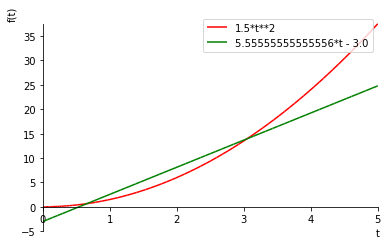

In [35]:
p = plot(xt, xb, (t, 0, 5), legend=True, show=False)
p[0].line_color ='red'
p[1].line_color = 'green'
p.show()

Looks like the bicycle overtakes the truck after about 0.6 s and the truck will overtake the bicycle at around 3 s.  Let's solve for that time exactly.

In [36]:
soln = solve(xb - xt, t)
soln

In [37]:
t1, t2 = soln
display( t1.evalf(3), t2.evalf(3)) # pay attention to significant figures

The bicycle overtakes the truck after 0.66 s.  The truck overtakes the bicycle after 3.05 s.

## 2. The bicycle and the truck generalized
A truck is waiting at a red light.  A cyclist trying to catch up is 3 m behind the truck just as the light turns green.  The cyclist travels at a velocity of roughly 20 km/h, but can't keep up the pace.  The velocity of the bicylce is given by (4 e$^{-t/3}$ + 2)  m/s, with t measured from the moment the light turns green in s, while the truck accelerates at a rate of (2 - 0.1 t)  m/s^2.  When does the truck overtake the bicycle (answer to 3 sig figs.)?

Velocity of bicycle as a function of t.

In [173]:
vb = 4 * exp(-t/3) + 2
vb

To get the position of bicycle as a function of time, we must integrate the velocity, bearing in mind that position is zero at t=0.

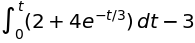

In [174]:
xb = Integral(vb, (t, 0, t)) - 3
display(xb)

xb = xb.doit()
xb



Position of truck as a function of time (we must integrate twice)

In [175]:
at = 2 - 0.1 * t
vt = integrate(at, (t, 0, t))
xt = integrate(vt, (t, 0, t))
xt

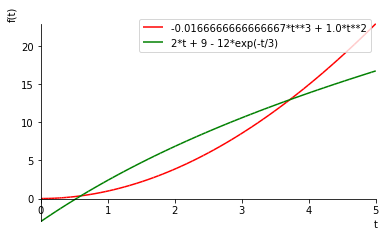

In [176]:
p = plot(xt, xb, (t, 0, 5), legend=True, show=False)
p[0].line_color ='red'
p[1].line_color = 'green'
p.show()

Looks like truck will overtake the bicycle at around 4 s.  Let's solve for that time exactly.

In [177]:
solve(xb - xt, t)  ## NOTE: this will give an (expected) error!

NotImplementedError: multiple generators [t, exp(t/3)]
No algorithms are implemented to solve equation t**3/60 - t**2 + 2*t + 9 - 12*exp(-t/3)

This time the function solve can't solve the set of equations exactly (analytically).  If solve can't do it, We need to use a numerical root finder, but we need to give an initial guess.

In [178]:
soln = nsolve(xb - xt, 4)
soln

Considering significant figures, we can evaluate this to a 3 significant figures.

In [179]:
N(_,3)

The truck overtakes the bicycle after 3.72 s.

***
Getting xt a different way... as an ODE

In [77]:
xt = Function('xt')
ode = diff(xt(t), t, t) - at
soln = dsolve( ode ).rhs
soln

We need to add appropriate initial conditions to solve for the unknown coefficients.

In [78]:
coeffs = solve( [ soln.subs(t, 0) - 0,            # xt(0) = 0
                  diff( soln, t).subs(t, 0) - 0,  # vt(0) = 0
                ])
coeffs


Now substitute these back into our solution.

In [79]:
xt_soln = soln.subs(coeffs)
xt_soln

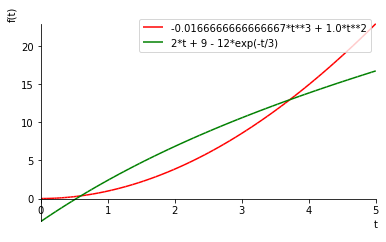

In [80]:
p = plot(xt_soln, xb, ('t', 0, 5), legend=True, show=False)
p[0].line_color ='red'
p[1].line_color = 'green'
p.show()

If you are using SymPy 1.3 or newer, then we could also write

In [87]:
ode = diff(xt(t), t, t) - at

ics = {xt(0):0,
       diff(xt(t), t).subs(t, 0):0 }
dsolve( ode, func=xt(t), ics=ics)

## 3. Another ODE: Simple Harmonic Oscillator

Consider a block of mass $m$ attached to a spring on a horizontally frictionless table. Experiments have shown that the force exerted by a spring is linearly proportional to the distance

$$ x $$

the spring is displaced from its equilibrium position. Mathematically, this is

$$ F = -k x $$

where $k$ is the spring constant. Its value depend on the particular spring used. Newton's Second Law then gives

$$ m a = -k x \quad \mathrm{(1)}$$

Since $ a = d^2x / dt^2, this yields the ordinary differential equation

$$ m \frac{d^2 x}{d t^2} = - k x \quad \mathrm{(2)}$$

with the initial conditions

$$ x(0) = x_i, \quad v(0) = v_i $$

where $v$ is the velocity.  In the previous example, acceleration (force) was given an explicit time dependence. Instead, the force here depends on position.  A general solution to (2) was found analytically back in PHYS1050 in terms of sines and cosines, and we can recover it here.

In [115]:
# define our variables
x = symbols('x', cls=Function)
t = symbols('t')
k, m = symbols('k, m', positive=True)
xi, vi = symbols('x_i, v_i')

In [116]:
general_soln = dsolve( m*diff(x(t), t, t) + k * x(t), x(t)).rhs
general_soln

Use the initial conditions to solve for the unknown coefficients

In [102]:
coeffs = solve ([ general_soln.subs(t,0) - xi, 
         diff(general_soln, t).subs(t, 0) - vi]
      )
coeffs

Substitute those coefficients back into the solution to the ODE

In [103]:
soln = general_soln.subs(coeffs[0])
soln

Or, with SymPy >= 1.3, directly as

In [118]:
soln = dsolve( m*diff(x(t), t, t) + k * x(t), x(t),
               ics = {x(0):xi, 
                      diff(x(t), t).subs(t, 0):vi}).rhs
soln

We often rewrite the natural frequency as $ \omega_0 = \sqrt(k)/\sqrt(m)$.

In [119]:
ω0 = Symbol('ω_0')
x = soln.subs(sqrt(k), ω0*sqrt(m))
x

Since there is no dissipation, i.e. no friction, the total mechanical energy of this system should be conserved. Let's check this. The total mechanical energy is the sum of the potential energy $U$ and kinetic energy $K$. The potential energy is given by $( k = \omega_0^2 m)$
    
$$ U = 1/2 k x^2 = 1/2 \omega_0^2 m x^2 $$
    
and the kinetic energy is

$$ K = 1/2 m v^2 $$

In [120]:
U = Rational(1,2) * ω0**2 * m * x**2
display(U)
K = Rational(1,2) * m * diff(x, t)**2
display(K)

Adding these contributions, we should get a constant.

In [121]:
EnergyE = U + K
EnergyE

In [122]:
simplify(EnergyE)

as expected.

## 4. Block on an inclined plane

A 1.5 kg block rests on a horizontal board hinged at one end.  The coefficient of static friction is μ=0.1.  The free end of the board is lifted very slowly.  At what angle will the block begin to slide down the board?

#### Solution

In [123]:
m, g, θ, μ = symbols('m, g, θ, μ')

The component of gravity acting along the board (r=0 is at the hinge, r increases up the board):

In [124]:
Fg_radial = - m * g * sin(θ)

The component of gravity acting prependicular to the board:

In [125]:
Fg_normal = - m *g * cos(θ)

Normal force:

In [126]:
Fnormal = - Fg_normal

Maximum upword force (in direction of increasing r) provided by static friction:

In [127]:
Fstatic = μ * Fnormal

Find θ at which Fg_radial + Fstatic = 0

In [128]:
Fg_radial

In [129]:
Fstatic

It looks like m and g will cancel out.

In [130]:
Fg_radial+Fstatic

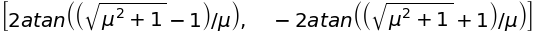

In [131]:
sol = solve(Fg_radial + Fstatic, θ)
sol

SymPy seems to doing something interesting with a tangent half-angle formula, but but it does give a valid solution.

Picking out the physically meaningful root...

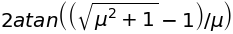

In [132]:
θc = sol[0]
θc

Indeed, m and g have cancelled out, but we need to specify μ to get a number

In [133]:
θc.subs(μ, 0.1) / pi * 180


In [134]:
N(_,3)

So the block will begin to slide down the board at an angle of 5.71 degrees.

## 5. Block on an rotating inclined plane

A 1.5 kg block rests on a horizontal board hinged at one end.  The block rests 0.3 m away from the hinge (hinge is at r=0).  The coefficient of static friction is μ=0.1.  The free end of the board is lifted so that angle between the board and the horizontal increases at a steady rate of ω=0.4 rad/s.  At what angle will the block begin to slide down the board?

The twist here is that since the board is rotating with a non-negligible speed, the block feels a centrifugal force pushing it away from the hinge (up the board).  Thus, the angle at which it begins to slide should be larger.  The centrifugal force is 

$$Fc = m r ω^2.$$ 

(Alternatively, the force of static friction provides the centripetal acceleration required to keep the block moving in constant circular motion while it as rest with respect to the board.)  Use $g$=9.80.

**Solution**

In [135]:
m, g, θ, μ, ω, r = symbols('m, g, θ, μ, ω, r')

The component of gravity acting along the board (r=0 is at the hinge, r increases up the board):

In [136]:
Fg_radial = -m *g *sin(θ)

Centrifugal force:

In [137]:
Fc = m*r* ω**2

The component of gravity acting prependicular to the board:

In [138]:
Fg_normal = -m*g*cos(θ)

Normal force:

In [139]:
Fnormal = -Fg_normal

Maximum upword force (in direction of increasing r) provided by static friction:

In [140]:
Fstatic = μ * Fnormal

Find θ at which Fgradial + Fstat + Fc = 0

In [141]:
Fg_radial

In [142]:
Fc

In [143]:
Fstatic

In [144]:
Fg_radial+Fstatic+Fc

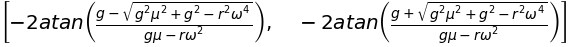

In [145]:
sol = solve( Fg_radial + Fstatic + Fc, θ)
sol

Again, picking out the physically meaningful root (small positive angle)

In [147]:
θc = sol[0]

We'll need to specify g, r, ω and μ

In [148]:
params = { μ:0.1, ω:0.4, r:0.3, g:9.8}

In [149]:
θc.subs(params)

In [150]:
N(_ / pi * 180, 3)

So the block will begin to slide down the board at an angle of 5.99 degrees.

## 6. Moving block on rotating inclined plane

The 1.5 kg block from the last example is now on the move.  The coefficient of kinetic friction is μ=0.09.  Plot the position of the block along the board up to t=1s according to the solution of Newton's equation.  When does the block hit the bottom of the board?

The twist here is that since the board is rotating with a non-negligible speed, in addition to the centrifugal force, the block feels a Coriolis force pushing it into the board.  The Coriolis force is

$$ F_{cor} = 2 m \frac{dr}{dt} \omega$$
    
which pushes into the board increasing the normal force.

***Solution***

In [154]:
m, g, θ, μ, ω = symbols('m, g, θ, μ, ω')
r = Function('r')

The component of gravity acting along the board (r=0 is at the hinge, r increases up the board):

In [155]:
Fg_radial = -m * g * sin(θ)

(negative since down the board)

Centrifugal force:

In [156]:
Fcen = m * r(t) * ω**2

(positive since up the board)

Coriolis force:

In [157]:
Fcor = -2 * m * diff(r(t), t) * ω

(negative since into the board)

The component of gravity acting prependicular to the board:

In [158]:
Fg_normal = -m * g * cos(θ)

Normal force:

In [159]:
Fnormal = - Fg_normal - Fcor

Force of kinetic friction (should be positive because it tries to keep the block from sliding down)

In [160]:
Fkin = μ * Fnormal

At t=0, angle is what we found in the last example

In [161]:
θ = ω*t + θc

Net force in the r direction

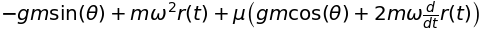

In [162]:
Fnet = Fg_radial + Fkin + Fcen
Fnet

(Friction is increased because of the coriolis force.)

Solving Newton's equation

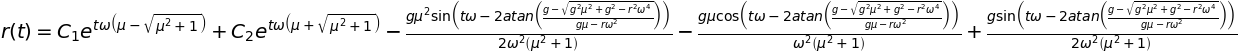

In [163]:
soln = dsolve( Fnet.subs(Symbol('θ'), θ) - m * diff(r(t), t, t), r(t))
soln

Fill in the physical parameters:

In [164]:
params = { g:9.8, ω:0.4, θc:0.104542323328808, μ:0.09}
r_soln = soln.subs(params).rhs
r_soln

Apply initial conditions r(0) = 0.3 m and r'(0) = 0.0 m/s

In [165]:
coeffs = solve ([ r_soln.subs(t, 0) - 0.3, 
                  diff(r_soln, t).subs(t, 0) - 0])
coeffs

Substitute those coefficients back in

In [166]:
path = r_soln.subs(coeffs)
path

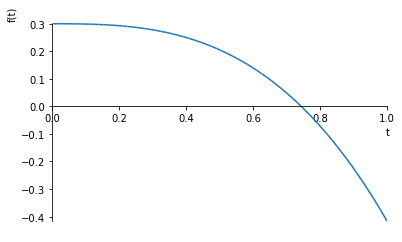

In [167]:
plot(path, (t, 0, 1))

In [168]:
t_end = nsolve( path, t, 0)
t_end

In [171]:
N(_, 2)

So the block slides down to the bottom in 0.74 s.

## 7. Collision on a track

Two carts are on a collision course on a frictionless track.  The first cart of mass m1=1.1 kg is moving to the right with v1=0.23 m/s while the second cart of mass m2=0.87 kg is moving to the left at v2=1.3 m/s.  Assuming the collision is elastic, find the velocities of the carts after the collision.

***Solution***

Conservation of momentum

$$ m_1 v_1 + m_2  v_2 = m_1 v_{1f}, + m_2 v_{2f} $$

In [180]:
m1, m2, v1i, v1f, v2i, v2f = symbols('m_1, m_2, v_1i, v_1f, v_2i, v_2f')

In Python the = means assignment and the == means equivalent; in SymPy to define a equation, we have to use the `Eq` function to denote equality of two expressions

In [181]:
eqp = Eq(m1 * v1i + m2 * v2i,  m1*v1f + m2*v2f)
eqp

Conservation of energy

In [182]:
eqe = Eq( m1 * v1i**2/2 + m2 * v2i**2/ 2, m1 * v1f**2/2 + m2 * v2f**2/ 2 )
eqe

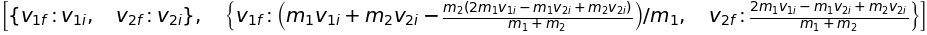

In [183]:
sol =  solve( [eqp, eqe], [v1f, v2f], dict=True ) 
sol

There are two solutions: the first the carts miss each other entirely. The second solution is the collision.

In [184]:
params = { m1:1.1, m2:0.87, v1i:0.23, v2i: -1.3} 
v1f_soln = sol[1][v1f].subs(params)
v2f_soln = sol[1][v2f].subs(params)

display(v1f_soln, v2f_soln)

In [185]:
v1f_soln.evalf(2)

The first cart ends up moving to the left at -1.1 m/s.

In [186]:
v2f_soln.evalf(2)

The second cart ends up moving to the right at 0.41 m/s.

## 8. Simulating the 1D collision

Suppose the colliding carts in example 7  are equipped with magnets so arranged that the carts feel a repulsive force of magnitude $0.1/d^4$ in newtons, where $d$ is the distance between the carts in metres.  

Let's say the carts start 5 m apart (initially $x_1$=0 and $x_2$=5 metres).  Everything else is as given in example 7.  Use `odeint` from SciPy  to solve Newton's equation and then plot $x_1(t)$, $x_2(t)$, $v_1(t)$ and $v_2(t)$.  Long after the collision, do the final velocities match those given by the answer to example 7?

***Solution***

In [194]:
m1, m2, t, v1i, x1i, v2i, x2i = symbols('m1, m2, t, v1i, x1i, v2i, x2i')
x1, x2 = symbols('x1, x2', cls=Function)

Force on cart1 depends on x1 and x2, and it always points to the left (negative)

In [195]:
F1 = - 0.1 / (x1(t) - x2(t) )**4

Equation of motion for cart1

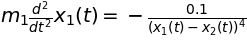

In [196]:
eq1 = Eq(m1 * diff(x1(t), t, t), F1)
eq1

Information for cart1

In [197]:
cart1 = { m1:1.1, v1i:0.23, x1i:0}

Equation of motion for cart2

Force on cart2 depends on x1 and x2, and it always points to the right (positive).  It's also equal and opposite the force on cart1.

In [198]:
F2 = -F1

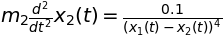

In [199]:
eq2 = Eq( m2 * diff(x2(t), t, t), F2)
eq2

Information for cart2

In [200]:
cart2 = { m2:0.87, v2i:-1.3, x2i:5}

Solving Newton's equation

In [201]:
dsolve( [eq1, eq2] ) 

NotImplementedError: 

Looks like SymPy can't do this analytically.  Let's try a numerical solver. 

In [202]:
# define initial values
m1 = 1.1;  v1i = 0.23; x1i = 0
m2 = 0.87; v2i = -1.3; x2i = 5
            
q0 = [x1i, v1i, x2i, v2i]

def RHS(q, t):
    x1, v1, x2, v2 = q
    return [v1,
            -0.1 / (x1 - x2)**4 / m1,
            v2,
            +0.1 / (x1 - x2)**4 / m2]

tf = 10
t = np.arange(0, tf, 0.1)

from scipy.integrate import odeint
soln = odeint(RHS, q0, t)
x1, v1, x2, v2 = soln.T

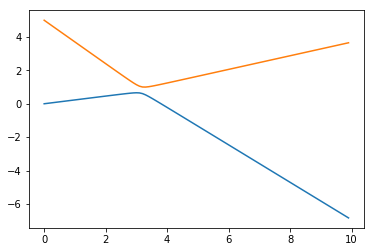

In [203]:
plt.plot(t, x1)
plt.plot(t, x2)

Looks like they "collide" at around 3 s.  Let's plot the velocities.

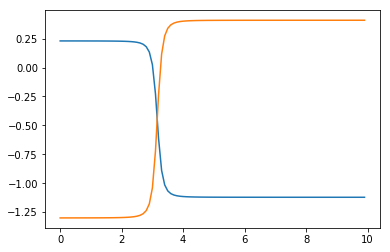

In [204]:
plt.plot(t, v1)
plt.plot(t, v2)

What are the "final" velocities?

In [205]:
print(v1[-1], v2[-1])

-1.12151120135 0.408807266073


These compare well with -1.12137 and 0.408629

In [206]:
rel_err1 = abs( (v1[-1] - (-1.12137))/ (-1.12137)) * 100
    
rel_err2 = abs( (v2[-1] - (0.408629)) / (0.408629)) * 100

print (rel_err1, rel_err2)

0.0125918607509 0.0436254091911


with only small percentage differences.

## 8. Collision in 2D

A block of ice of mass 4.5 kg rests on an ice rink.  Consider the ice rink as the xy-plane with the block at the origin.  A physicist slides another block of ice of mass 8.2 kg with a velocity of 0.3 m/s in the $x$ direction.  After colliding elastically and losing no energy to friction, the y component of the velocity of the physicist's block is 0.05 m/s.  The physicist also notes that the $x$ component of his block doesn't change all that much.  What is the resulting velocity of the smaller block of ice?

#### Solution

In [207]:
m1, m2, v1xi, v2xi, v1yi, v2yi, v1xf, v2xf, v1yf, v2yf = symbols('m_1, m_2,'
                                                                 'v_1xi, v_2xi, v_1yi, v_2yi,'
                                                                 'v_1xf, v_2xf, v_1yf, v_2yf,')
# there are also more compact ways of declaring many variables at once if need. See the docs.

Conservation of momentum

In [208]:
eqpx = Eq(m1*v1xi + m2*v2xi, m1*v1xf + m2*v2xf)

eqpy = Eq(m1*v1yi + m2*v2yi, m1*v1yf + m2*v2yf)

In [209]:
eqpx

In [210]:
eqpy

Conservation of energy

In [211]:
eqe = Eq( m1*(v1xi**2+v1yi**2)/2 + m2*(v2xi**2+v2yi**2)/2, 
          m1*(v1xf**2+v1yf**2)/2 + m2*(v2xf**2+v2yf**2)/2 )

eqe

Let's label with "1" quantities associated with the smaller, originally stationary block.
Let's label with "2" quantities associated with the larger, originally moving block (the physicist's block).

In [212]:
block1 = { m1:4.5, v1xi:0, v1yi:0 }

In [213]:
block2 = { m2:8.2, v2xi:0.3, v2yi:0, v2yf:0.05 }

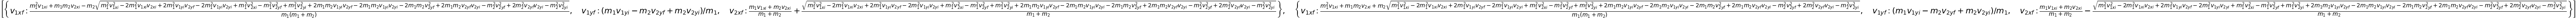

In [214]:
sol = solve( [eqpx,eqpy,eqe], [v1xf,v1yf,v2xf], dict=True )
sol

In [215]:
len(sol)

In [216]:
sol[0][v2xf].subs(block1).subs(block2), block2

In [217]:
sol[1][v2xf].subs(block1).subs(block2), block2

The first solution is the one we want as v2xf ~ v2xi .

In [218]:
sol[0][v1xf].subs(block1).subs(block2).evalf(2)

In [219]:
sol[0][v1yf].subs(block1).subs(block2).evalf(2)

Therefore, the velocity of the originally stationary block is 0.023 m/s in the x direction and 0.091 in the negative y direction.

## 10. Falling rope

A long coiled rope rests at the edge of a platform.  One free end is gently placed 10 cm below the edge of the platform and released.  The rope begins to fall, unwinding as it goes over the edge.  The rope has uniform mass per unit length of 2 kg/m, and $g$ = 9.8 m/s$^2$.  If the height of the platform is 4 m, find how long it takes for the end of the rope to reach the ground.  Ignore friction.

**Solution**

Here we must use the more general form of Newton's 2nd Law

$$ F = \frac {dp} {dt} = m(t)  y''(t) + m'(t) y'(t) $$

In [229]:
t, r, g, H = symbols('t, r, g, H')
m, y, v = symbols('m, y, v', cls=Function)

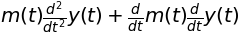

In [230]:
dpdt = m(t) * diff(y(t), t, t) + diff(m(t), t) * diff(y(t), t)
dpdt

Newton's 2nd Law

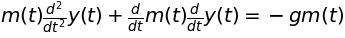

In [231]:
eqN = Eq(dpdt, -g*m(t))
eqN

If the length of the rope's end is $y=y(t)$, then the length of rope dangling over the edge is $h-y(t)$, and the mass of the rope is

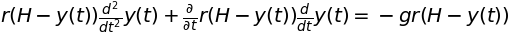

In [232]:
eq = eqN.subs( m(t), r*(H - y(t)))
eq

SymPy has done the substitution but not evaluated the derivatives.

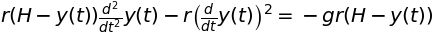

In [233]:
eq2 = eq.doit()
eq2

Let’s try to see if SymPy can find a general solution to the problem

In [234]:
dsolve(eq2, y(t))

NotImplementedError: solve: Cannot solve g*r*(H - y(t)) + r*(H - y(t))*Derivative(y(t), (t, 2)) - r*Derivative(y(t), t)**2

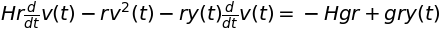

In [235]:
# replace derivative of y(t) with v(t)
eq3 = eq2.subs(    diff(y(t), t),   v(t)  )
expand(eq3)

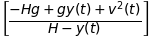

In [236]:
soln = solve(eq3, diff(v(t),t)  )
soln

In [237]:
dvdt = soln[0]

So we worked out the derivative of v(t). Let's turn that in to a function

In [238]:
F = lambdify([y(t), v(t), H, g], dvdt)
F(0, 1, 5, 9.8)

Now we can numerically solve our problem:

In [239]:
# define initial values
r = 2
H = 4 # m
g = 9.8
yi = H - 0.1 # m
vi = 0.0 # m/s

# Solve the system of ODEs
q0 = [yi, vi]

def RHS(q, t):
    y, v = q
    return [v,
            F(y, v, H, g)]

tf = 2
t = np.arange(0, tf, 0.1)

soln = odeint(RHS, q0, t)
y, v = soln.T

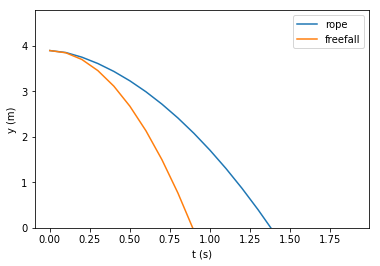

In [240]:
plt.plot(t, y, label='rope')
plt.plot(t, yi - 0.5*g*t**2, label='freefall')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(ymin = 0)
plt.legend()

Also plotted in the graph is the height of an object falling freely initially alongside the rope end.  The rope falls more slowly.

## 11. Atwood's machine

Atwood's machine, a familiar construct to budding physicists, consists of two masses hanging by a non-elastic rope of negligible mass running over a small, massless and frictionless pulley.  Find the height of mass 1 as a function of time in terms of relevant parameters of the system.

***Solution***

In [241]:
a1, a2, m1, m2, t, C = symbols('a1, a2, m1, m2, t, C')
g, T = symbols('g, T')
y1, y2 = symbols('y1, y2', cls=Function)

Because of the geometrical setup of the system, the accelerations of the masses are equal in magnitude and opposite in direction.  Let's write the length of the string in terms of y1 and y2 (which we take to be negative).

In [242]:
L = -y1(t) - y2(t) + C

To get the relationship between the accelerations of mass 1 and 2, we use the constraint that L does not change in time.  Indeed, its second derivative wrt t is also 0

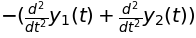

In [243]:
diff(L, t, t)  

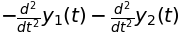

In [244]:
diff(diff(L, t), t)

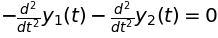

In [246]:
eqc = Eq( diff(diff(L, t), t), 0)
eqc

Forces on mass 1

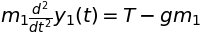

In [247]:
eq1 = Eq( m1 * diff(y1(t), t, t) , - m1 * g + T)
eq1

Forces on mass 2

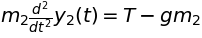

In [248]:
eq2 = Eq( m2 * diff(y2(t), t, t) , - m2 * g + T)
eq2

Let's solve for $y_1''(t)$, eliminating $T$ and $y_2''(t)$ from the equations

In [249]:
solve([eq1, eq2, eqc], diff(y1(t),t,t)) ## WHY DOESN'T THIS WORK???

Write our equation in terms of accelerations.

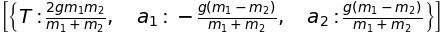

In [250]:
eq1 = Eq(m1 * a1, -m1 * g + T)
eq2 = Eq(m2 * a2, -m2 * g + T)
eqc = Eq(a1, -a2)

soln = solve([eq1, eq2, eqc])
soln

Construct a differential equation for $y_1(t)$

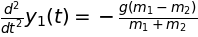

In [251]:
eqD = Eq( diff(y1(t), t, t), soln[0][a1])
eqD

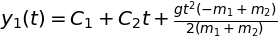

In [252]:
sol = dsolve( eqD )
display(sol)

y1_sol = sol.rhs

Solve for the coefficients

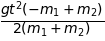

In [253]:
coeffs = solve (  [  Eq(y1_sol.subs(t,0), 0),  # y1(0) =0
                     Eq(diff(y1_sol, t).subs(t,0), 0) # y1'(0) = 0
                  ] )
y1_sol.subs(coeffs)

Before we could plot this function, we would have to provide numbers for the various parameters.

This problem has an analytical solution.  If it did not, then we would need to solve it with the numerical solver NDSolve, which requires a time interval over which to solve for the function.  We also have to make sure that all parameters have numerical values.

In [254]:
q0 = [0, 0] # initial condition
params = {m1:3.2, m2:3, g:9.8}
F = lambdify( [t], soln[0][a1].subs(params) )
             
def RHS(q, t):
    y, v = q
    return [v, F(t)]
t_num = np.arange(0, 2, 0.1)
sol = odeint(RHS, q0, t_num)
y1_soln_num, v1_soln_num = sol.T

Text(0,0.5,'y')

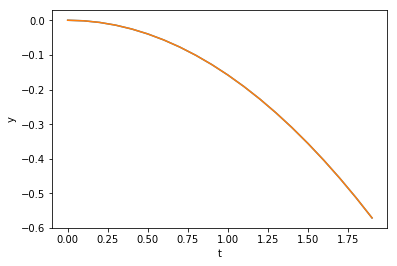

In [255]:
plt.plot(t_num, y1_soln_num)
plt.plot(t_num, lambdify( [t], y1_sol.subs(coeffs).subs(params) )(t_num) )
plt.xlabel('t')
plt.ylabel('y')

## 12. Atwood's machine swinging

Now consider the case where one of the masses, m1=1 kg, of an Atwood Machine is free to swing.  The system is constructed in such a way that the swinging mass won't collide with the other mass or the string.  Consider this as a 2D problem with the pulley at the origin.  $m_2$ = 1 kg.  Initially $x_1$=-0.5 m, $y_1$=-4 and $y_2$=-8.  Show an animation of the motion of the two masses for the first 20 s.


## 13. Atwood's machine over a table

Block 1 of mass $m_1$=5 kg lies on a frictionless table, and is connected by a non-elastic string running parallel to the table through a pulley to a second block of mass $m_2$= 1 kg hanging vertically.  Solve.


## 14. Atwood's machine over a table with an angle

Block 1 of mass m1=5kg lies on a frictionless table, and is connected by a non-elastic string running through a pulley to a second block of mass m2=1kg hanging vertically.  The pulley is a height h above the origin (technically at y=-h).  Thus the string forms an angle θ with the horizontal.  θ changes as the blocks move, resulting in a non-constant tension.  Furthermore, the accelerations of the blocks are not equal in magnitude in general.  We can assume that block 1 stays on the table and doesn't lift off.  For initial conditions x(0) = 4 and x'(0)=0, and h = 4, plot the position of block 1 for the first 4 seconds along with the corresponding solution from 2.12.
